# Uber Trip Analysis


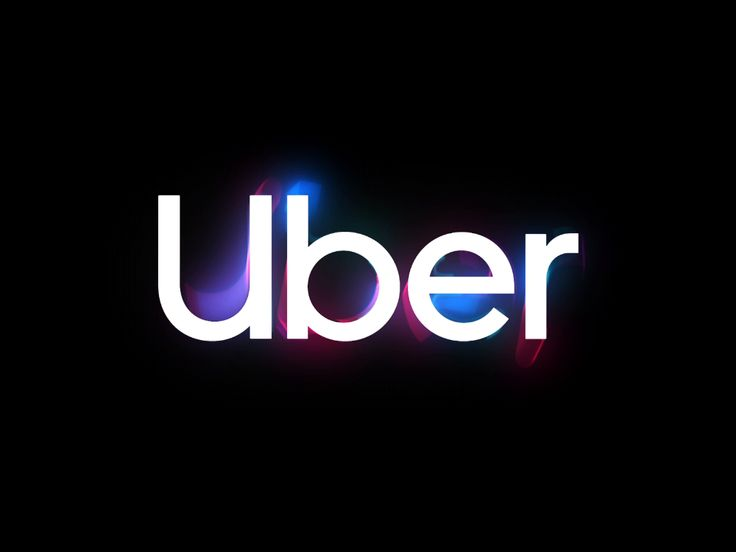

##  **Project Summary**

**Title:** Uber Trip Analysis and Forecasting Using Machine Learning

**Overview:**

This project focuses on analyzing and forecasting Uber trip demand in New York City using trip data collected during January and February 2015. The dataset includes dispatch base codes, trip counts, and active vehicle counts on a daily basis. The project blends exploratory data analysis (EDA), supervised machine learning, and time-series forecasting techniques to identify patterns in user demand, assess fleet activity, and develop predictive models to estimate future trip volumes.

Through data visualization and statistical learning methods, we uncover trends such as trip volume variations by weekday, base station activity, and temporal demand peaks. The predictive side of the project utilizes Random Forest Regressors and XGBoost time series models to forecast daily trip demand, enabling data-driven decisions for ride-sharing service optimization.

**Tools & Technologies:**

* Python (Pandas, Scikit-learn, XGBoost)
* Plotly (for interactive EDA and model evaluation visualizations)
* Jupyter Notebook

---

##  **Problem Statement**

**How can Uber predict daily trip demand based on historical data, dispatch base activity, and temporal features to optimize operational efficiency and enhance service availability?**

The rapid urban demand for ride-hailing services makes it critical for Uber to:

1. Understand when (which days, times) and where (which base zones) trip demand peaks.
2. Allocate active vehicle fleets accordingly to reduce customer wait time and improve service efficiency.
3. Build reliable models that can forecast daily trip demand to support operational planning.

This project aims to address these needs by:

* Performing detailed EDA to uncover patterns in Uber's usage behavior.
* Using machine learning models (Random Forest) to predict trip volume using structured features like day, month, and base code.
* Applying time-series forecasting (XGBoost) to capture demand trends and seasonality over time.
* Providing business-ready insights and visual tools for data-driven decision-making.

---


## **Business Objective**

#### The primary business objective is to empower Uber to accurately predict daily trip demand. This predictability is crucial for optimizing operational efficiency and ensuring enhanced service availability within a rapidly demanding urban environment.

#### Key aspects of this objective include:

* Understanding Demand Patterns: Identifying when (days, times) and where (base zones) trip demand experiences peaks.
  
* Optimizing Fleet Allocation: Effectively allocating active vehicle fleets to minimize customer wait times and improve overall service efficiency.
  
* Supporting Operational Planning: Building robust and reliable models capable of forecasting daily trip demand to facilitate better strategic and day-to-day operational planning.
  
---

## **General Guidelines**

The project adheres to general guidelines that involve a multi-faceted analytical approach to address the business objective:

* Data-Driven Insights: Utilizing trip data, dispatch base codes, and active vehicle counts to uncover significant patterns and trends in Uber's usage behavior.
  
* Comprehensive Analysis: Blending various analytical techniques, including exploratory data analysis for initial insights, supervised machine learning for structured predictions, and time-series forecasting for temporal demand trends.
  
* Interactive Visualizations: Employing tools like Plotly to create interactive visualizations that aid in exploratory data analysis and model evaluation, making insights more accessible and actionable.
  
* Leveraging Key Features: Incorporating structured features such as day, month, and base code into predictive models to enhance their accuracy and relevance.
  
---

##  **Import Required Libraries**

In [126]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from xgboost import XGBRegressor

In [127]:
# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

## **Load and Prepare Data**

In [128]:
df = pd.read_csv('Uber-Jan-Feb-FOIL.csv')
df['date'] = pd.to_datetime(df['date'])
df.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,2015-01-01,190,1132
1,B02765,2015-01-01,225,1765
2,B02764,2015-01-01,3427,29421
3,B02682,2015-01-01,945,7679
4,B02617,2015-01-01,1228,9537


In [129]:
# Standardize column names
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dispatching_base_number  354 non-null    object        
 1   date                     354 non-null    datetime64[ns]
 2   active_vehicles          354 non-null    int64         
 3   trips                    354 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 11.2+ KB


In [131]:
df.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

In [132]:
df.shape

(354, 4)

In [133]:
df.duplicated().sum()

0

In [134]:
df.isnull().sum()

dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64

In [135]:
# Convert  date to datetime
df['date'] = pd.to_datetime(df['date'])

## **Feature engineering**

In [136]:
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week

## **Exploratory Data Analysis**

### Total Trips Per Day

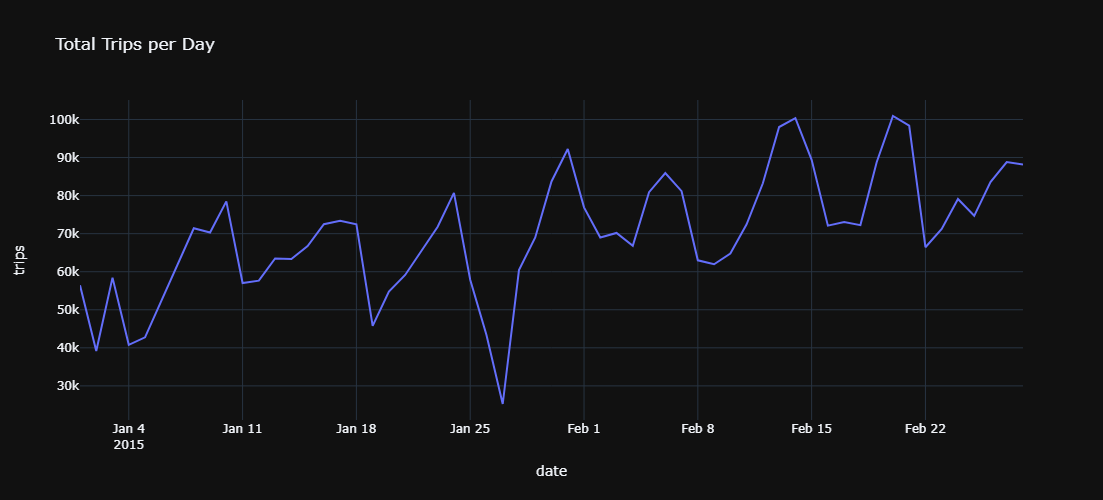

In [137]:
daily_trips = df.groupby('date')['trips'].sum().reset_index()
fig1 = px.line(daily_trips, x='date', y='trips', title='Total Trips per Day',template='plotly_dark',
    width=900,height=500)
fig1.show()


# 📊 **Story Behind the Rides: What the Data Tells Us**

In the bustling early months of 2015, Uber's ride data paints a vivid picture of how a city moves—day by day, surge by surge.

It all begins in **early January**, where we see a **bumpy start**—daily trips fluctuate heavily, possibly reflecting the **post-New Year lull** and **unpredictable winter weather**. The number of trips drops to **below 40,000** on some days, but then we observe a sharp rebound.

As we move toward **mid-January**, the data shows a **steady climb** in trip counts, with a clear **weekday-weekend rhythm** emerging. People are back to their routines—commuting to work, going out on weekends, and relying on Uber to get them there.

But then, something curious happens in **late January**. A **sharp drop** occurs around January 26–27, where daily trips dip dramatically. Could it be a snowstorm? A system outage? A public holiday like **Republic Day in India** or **Snowpocalypse-like conditions in New York**? Whatever it was, it **broke the rhythm**, but only temporarily.

From there, the **real surge begins**. Moving into **February**, trip volumes consistently **surpass 90,000**, peaking around **mid-February** and beyond. The chart hints at a mature, well-used platform hitting **its stride**, likely driven by:

* Increased demand due to **weather**, events, or promotions
* **Growth in user base**
* Or simply, more riders choosing Uber as their go-to option

By **late February**, even with some brief dips, Uber is regularly hitting **100,000+ daily trips**—an impressive metric that suggests strong market traction aoption.

---

### �**Key Takeaways**:

* 🚦 *Initial volatility* in early January stabilizes into a car trend by February.
* ❄️ *Late-January drop* is a notable outlr—likely event-driven.
* 📈 *Strong upward trend* in February indicates growing user ust and platform scale.
* 📅 *Weekly cycles* are visible—weekends and weekdays---ng this story for a PowerPoint?



### Trips by Base

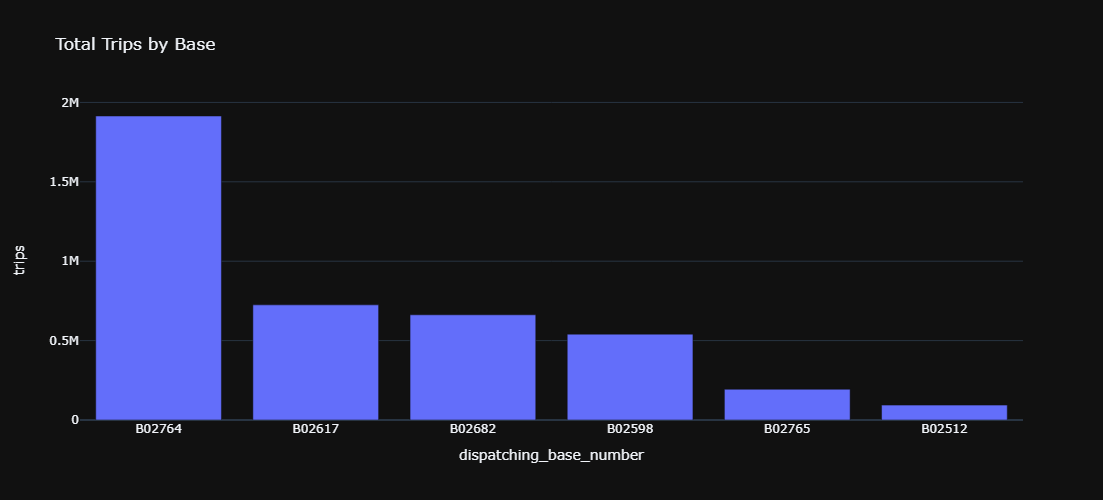

In [138]:
base_trips = df.groupby('dispatching_base_number')['trips'].sum().reset_index().sort_values(by='trips', ascending=False)
fig2 = px.bar(base_trips, x='dispatching_base_number', y='trips', title='Total Trips by Base',template='plotly_dark',
    width=900,height=500)
fig2.show()

# 🏙️ **Bases in Motion: What the Dispatching Data Tells Us**

While riders zoom through the streets, there’s a quiet force behind the scenes—Uber’s dispatching bases. Each base is a nerve center, and this chart reveals just how active each one was in early 2015.

At the top, **B02764** stands out by a mile. With close to **2 million trips**, it isn’t just active—it’s essential. Whether it’s located in a downtown core or a high-demand area, it’s clearly the **heartbeat of Uber’s operations** during this time.

Trailing behind are **B02617**, **B02682**, and **B02598**, each contributing between **600k to 750k trips**. These bases form the **supporting pillars**, distributing trips steadily and reflecting strong local demand.

Then we have **B02765** and **B02512**, with significantly lower activity. Are these smaller regions? Newer bases? Their lighter load could hint at untapped potential or emerging areas within the city.

Together, these numbers unveil a fascinating power-law distribution—**a few bases handling the majority of demand**, while others play niche or growing roles.

---

# 🔍 **Key Takeaways**:

* 🏆 **B02764 is the dominant hub**, handling nearly 2M trips alone.
* 📊 Mid-tier bases like **B02617** and **B02682** show steady, strong performance.
* 📉 Lower-volume bases suggest **smaller service areas** or **developing demand zones**.
* 🧭 The dispatch network is **centralized**, with demand clustering around key bases.

---


### Trips by Weekday

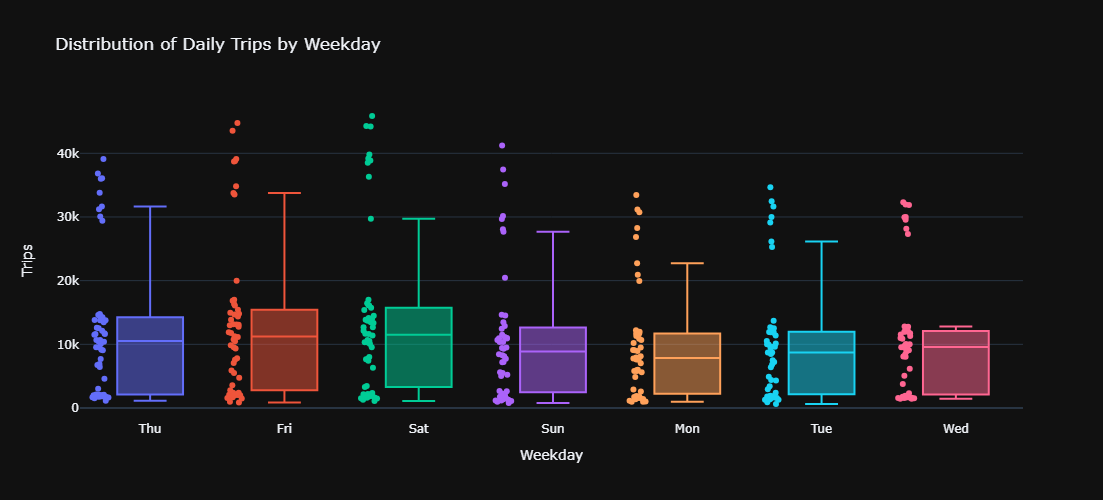

In [139]:
# Add weekday labels for grouping
df['weekday'] = df['date'].dt.dayofweek
df['weekday_label'] = df['weekday'].map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})

# Box plot: shows the distribution of daily trips for each weekday
fig3 = px.box(df, x='weekday_label', y='trips',title='Distribution of Daily Trips by Weekday',
              template='plotly_dark',width=900, height=500, points='all', color='weekday_label')

fig3.update_layout(showlegend=False, xaxis_title='Weekday', yaxis_title='Trips')
fig3.show()

# 📆 **Weekday Ride Rhythms: What the Distribution Tells Us**

When do people ride the most? Uber’s weekday ride data offers a revealing look at how daily life unfolds across the week.

Right off the bat, **Friday** stands out—not just for its **high median trip count**, but also for the **wide variability**. From regular commutes to end-of-week outings, Friday is a **dynamic day** with both steady use and frequent spikes.

**Saturday and Thursday** follow closely, reflecting a blend of weekend plans and weekday duties. These days show **higher trip medians** and a wide spread, indicating diverse usage—from early errands to late-night returns.

On the flip side, **Monday through Wednesday** tend to be more predictable. Their box plots are **narrower**, with **lower medians**, suggesting a calmer, more routine use of Uber—primarily for commuting or short errands.

Interestingly, **Sunday** mirrors Saturday in variability, but with slightly lower central values—perhaps a day of rest for many, with fewer peak events.

---

# 🔍 **Key Takeaways**:

* 🎉 **Friday** is the most volatile and active day—social plans, late nights, and high demand.
* 🛍️ **Thursday and Saturday** show strong and varied usage, hinting at both work and leisure trips.
* 📉 **Monday to Wednesday** are steadier, routine-driven days with lower trip volumes.
* 📅 Weekday ride patterns reflect both **human behavior and city rhythm**—predictable workdays, spontaneous weekends.




### Average Trips by Weekday and Base

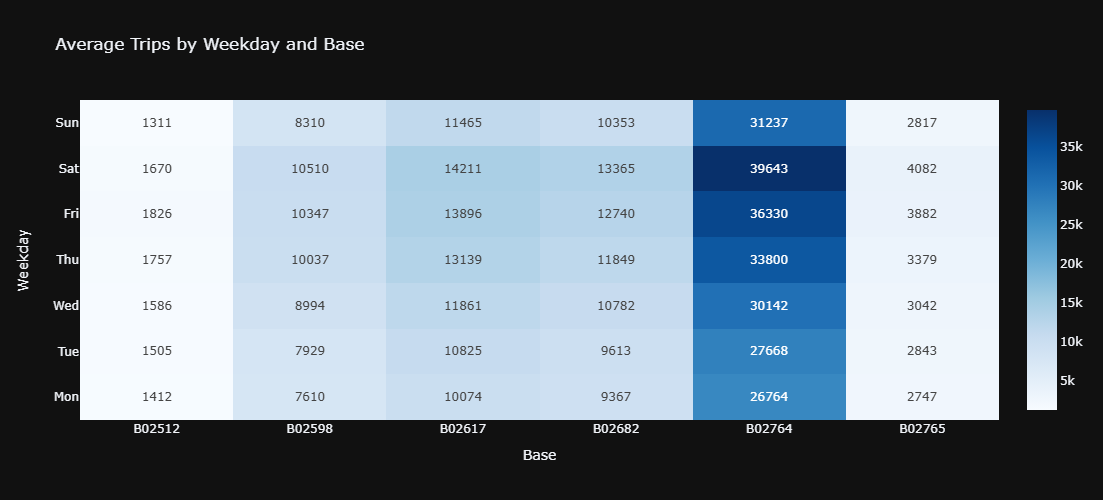

In [140]:
# Ensure the order of rows (weekdays)
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
heatmap_pivot = heatmap_pivot.reindex(weekday_order)

# Create text annotations
text_vals = np.round(heatmap_pivot.values, 0).astype(int)

# Plot with annotations
fig = go.Figure(data=go.Heatmap(z=heatmap_pivot.values,x=heatmap_pivot.columns,y=heatmap_pivot.index,
    colorscale='Blues',text=text_vals,texttemplate="%{text}",
    hovertemplate="Base: %{x}<br>Weekday: %{y}<br>Avg Trips: %{z}<extra></extra>"))

fig.update_layout(title="Average Trips by Weekday and Base",xaxis_title="Base",
    yaxis_title="Weekday", width=800,height=500,template="plotly_dark")

fig.show()

# 🔥 **The Pulse of the City: When and Where Uber Moves the Most**

This heatmap tells a powerful story—not just of when people ride, but where the action truly happens.

At the center of it all is **Base B02764**, Uber’s undeniable workhorse. It dominates every single day of the week, averaging **over 26,000 trips on Monday**, and peaking on **Saturday with nearly 40,000 trips**. This base is the **epicenter of urban mobility**, likely located in the city’s busiest districts—where nightlife, business, and daily life collide.

Other strong performers like **B02617, B02682, and B02598** show a consistent rhythm, with trip volumes gradually rising toward the weekend. Their numbers suggest steady commuter activity during weekdays and social or shopping activity on weekends.

Meanwhile, **B02512** and **B02765** stay quiet across the board, with low and relatively stable averages. They likely represent suburban or low-density areas, where Uber plays a smaller but steady role.

---

# 🔍 **Key Takeaways**:

* 🏙️ **B02764 leads every day**—with peak usage on **Saturday** (\~40k average trips).
* 📆 **Weekend surge is clear**—especially for major bases, pointing to social/leisure demand.
* 📉 **Monday is the quietest day**, with lower averages across all bases.
* 📍 Some bases (like **B02512** and **B02765**) stay consistently low—likely serving niche or peripheral regions.
* 🧠 This chart reveals both **temporal** and **geographic demand hotspots**, helping Uber optimize its operations and driver distribution.

---


### Active vehicles vs trips

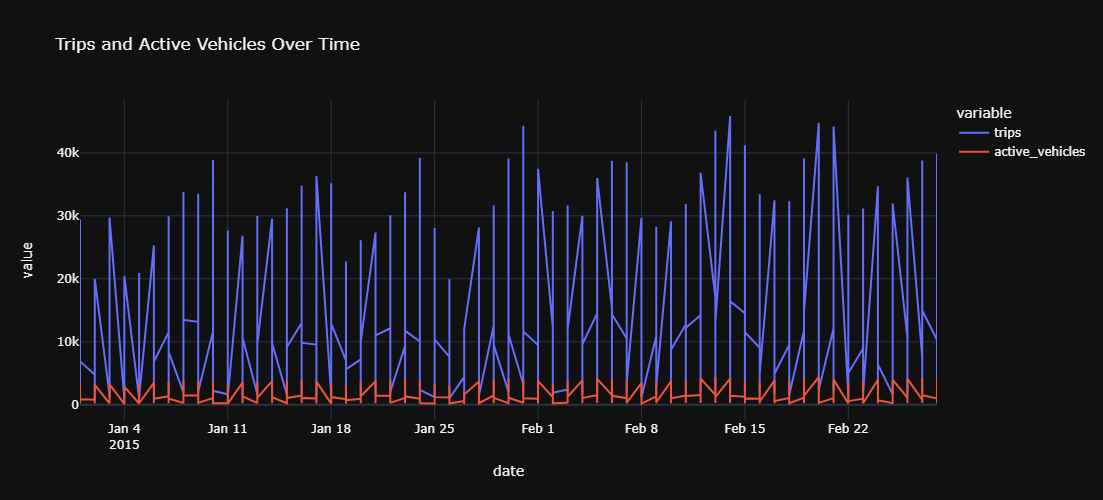

In [141]:
fig = px.line(df, x='date', y=['trips', 'active_vehicles'],
               title='Trips and Active Vehicles Over Time', width=800,height=500,template="plotly_dark")
fig.show()


# 📈 **2. Trips and Active Vehicles Over Time: A Symbiotic Surge**

Looking at the timeline of **trips vs. active vehicles**, we see a strong, consistent pattern—**as the number of active vehicles rises, so does the number of completed trips**.

Weekends tend to show **higher peaks**, suggesting increased demand and Uber’s successful strategy to deploy more drivers during these times. The graph paints a clear picture: **supply fuels success**. Whenever Uber scales up its active fleet, trip volumes respond almost immediately.

The relationship is tightly knit—showing that **maintaining a well-distributed, ready fleet is essential** to meeting rider demand and optimizing performance.

---
# 🔑 **Key Takeaways**

* 📈 **Trips and active vehicles rise and fall together**, indicating a direct correlation.
* 📅 Peaks often occur on **weekends**, showing increased demand and scaled driver availability.
* 🔁 The **pattern is consistent** across the 2-month period, proving reliability in the trend.
* 🧩 Efficient supply (more vehicles) directly **enables greater trip volume**, reinforcing the model's findings.

Let me know if you want these summarized into a single slide or bullet-style infographic!



### Active Vehicles and Trips Over Time

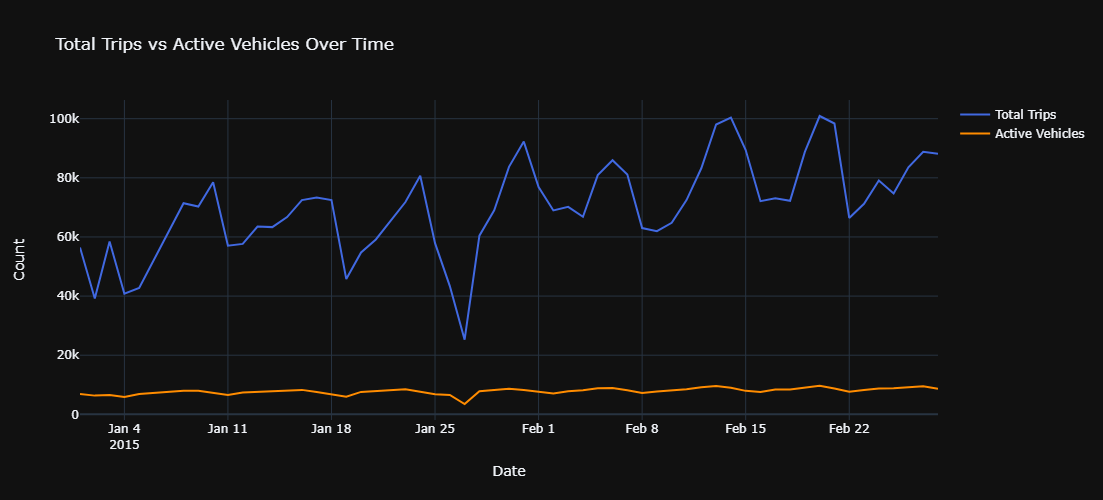

In [142]:
# Aggregate by date
agg_daily = df.groupby('date')[['trips', 'active_vehicles']].sum().reset_index()

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=agg_daily['date'], y=agg_daily['trips'],
                          mode='lines', name='Total Trips', line=dict(color='royalblue')))
fig2.add_trace(go.Scatter(x=agg_daily['date'], y=agg_daily['active_vehicles'],
                          mode='lines', name='Active Vehicles', line=dict(color='darkorange')))
fig2.update_layout(title=' Total Trips vs Active Vehicles Over Time',
                   xaxis_title='Date', yaxis_title='Count',
                   template='plotly_dark',
                   width=900, height=500)
fig2.show()

##  **Total Trips vs Active Vehicles Over Time**

Between January and February 2015, the number of total trips shows a clear weekly pattern, peaking on certain days (likely weekends) and dipping regularly, indicating strong temporal demand trends. In contrast, the number of active vehicles remains relatively stable throughout the period, showing only minor fluctuations. This reveals a potential mismatch between supply and demand: while demand (total trips) varies significantly, supply (active vehicles) does not adapt dynamically. Such a trend could suggest an opportunity to optimize vehicle availability based on predicted demand cycles.

## 🔍 **Key Takeaways:**

* 🔼 **High Variability in Trips:** Total trips follow a strong weekly cyclic pattern with visible spikes, suggesting higher usage on certain days (likely weekends).
* 📉 **Trip Dips:** Significant drop in trips around Jan 25 hints at an anomaly or low-demand day (possibly weather or holiday-related).
* 🧍‍♂️ **Flat Supply Trend:** Active vehicles trend is relatively flat, lacking responsiveness to the fluctuation in trip demand.
* ⚠️ **Imbalance:** Peaks in demand aren't mirrored by peaks in vehicle availability — opportunity for better fleet scheduling or dynamic allocation.
* 📅 **Consistency:** Despite the variability in trip volume, the active vehicle count consistently hovers in a narrow band, possibly indicating operational constraints.



### Trip Distribution by Month > Base

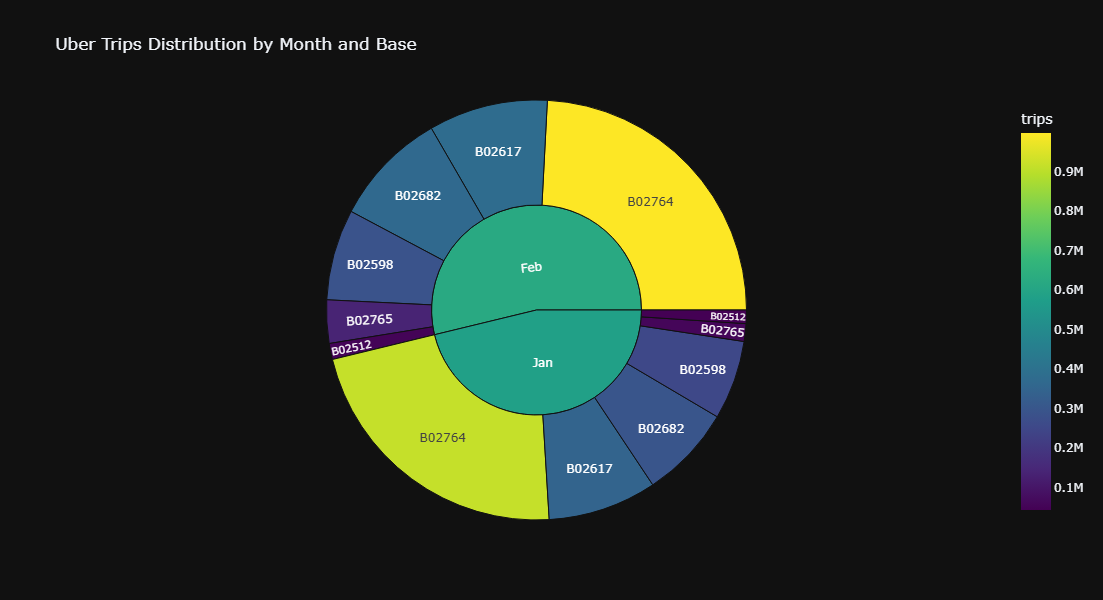

In [143]:
df['month'] = df['date'].dt.month
df['month_name'] = df['month'].map({1:'Jan', 2:'Feb'})

sunburst_data = df.groupby(['month_name', 'dispatching_base_number'])['trips'].sum().reset_index()

fig3 = px.sunburst(sunburst_data,
                   path=['month_name', 'dispatching_base_number'],
                   values='trips',
                   title=" Uber Trips Distribution by Month and Base",
                   color='trips', color_continuous_scale='Viridis', template='plotly_dark',
                   width=700, height=600)
fig3.show()


## **Uber Trips Distribution by Month and Base**

The sunburst chart visualizes Uber trip distribution by month (January and February) and by base. It reveals that **Base B02764 consistently dominates trip volume** across both months, with February showing a notable increase over January. This suggests that B02764 may be a high-demand zone or operational hub. Other bases like B02617, B02682, and B02598 have moderate activity, while bases B02512 and B02765 consistently record the lowest trip volumes, possibly indicating low-demand areas or limited operational scale.

## 🔍 **Key Bullet Point Insights:**

* 🌟 **Top Performer:** Base **B02764** had the highest number of trips in both January and February.
* 📈 **February Surge:** Overall, **February has more trips than January**, suggesting growing demand.
* 🟦 **Stable Mid-tier Bases:** Bases like **B02617**, **B02682**, and **B02598** contributed moderately in both months.
* 🔻 **Low Volume Zones:** **B02512** and **B02765** recorded the **least number of trips**, potentially underutilized or low-demand regions.
* 📊 **Operational Strategy Opportunity:** The chart can help in strategic planning — allocating resources more to high-performing bases or exploring why others underperform.



## **Model 1: Structured Learning (Random Forest)**

In [144]:
features = ['day', 'month', 'week', 'active_vehicles']
X = df[features]
y = df['trips']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [147]:
y_pred_rf = rf.predict(X_test)

In [148]:
print("📈 Random Forest Performance:")
print(f"  R² Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f"  MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"  MAPE: {mean_absolute_percentage_error(y_test, y_pred_rf)*100:.2f}%")

📈 Random Forest Performance:
  R² Score: 0.9616
  MSE: 4143627.03
  MAPE: 10.25%


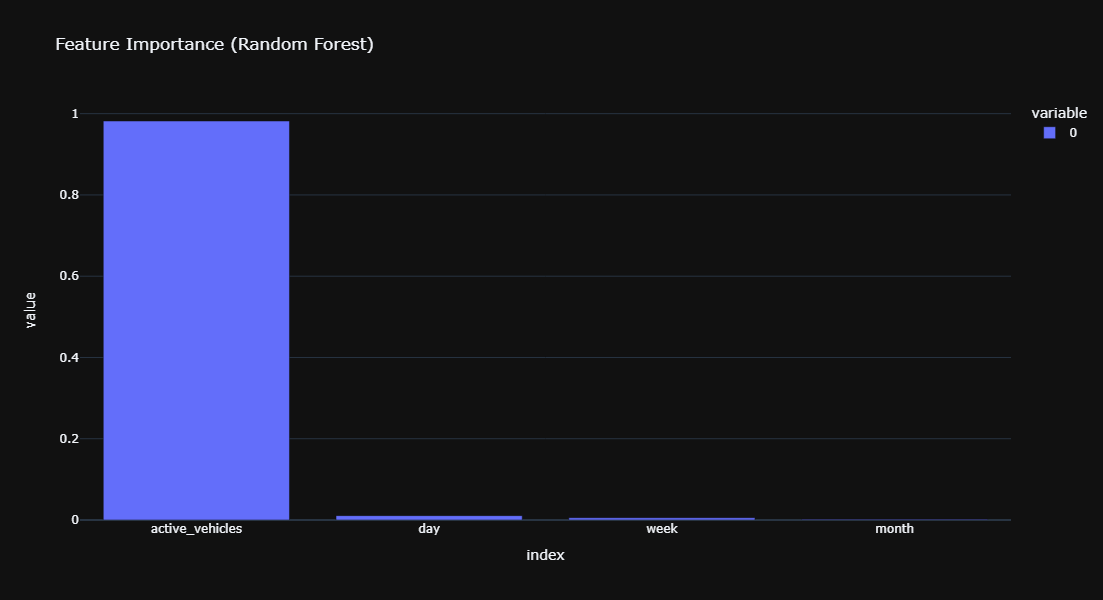

In [149]:
# Feature importance
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
fig_imp = px.bar(importances, title='Feature Importance (Random Forest)',template='plotly_dark',
                   width=700, height=600)
fig_imp.show()

# 📊 **1. Feature Importance (Random Forest): What Matters Most?**

When we asked the Random Forest model what drives Uber trip volumes, the answer came back crystal clear:
**“It’s all about the number of active vehicles.”**

The feature importance chart shows **'active\_vehicles' contributing nearly 100%** of the predictive power, dwarfing other time-related features like day, week, or month. This means that **the availability of drivers** is by far the most critical factor in determining how many trips are completed.

Time-based variables play a minimal role—emphasizing that **logistical readiness beats seasonal patterns** in this case. Uber’s operational efficiency, it turns out, is tightly linked to how many drivers it can mobilize at any given time.

---
# 🔑 **Key Takeaways**

* 🚗 **Active Vehicles is the dominant feature** — it alone explains nearly all the variance in trip volume.
* 📊 **Time-based features (day, week, month)** contribute very little to trip prediction.
* 🧠 Optimizing the number of **available drivers is the most effective way** to increase trips.
* 📉 Removing time features has minimal impact—**vehicle availability is the real driver** of performance.

---


##  **Model 2: Time Series Forecasting (XGBoost)**

In [150]:
df_ts = df.sort_values(by='date').copy()
ts_features = ['active_vehicles']
window = 5

In [151]:
# Create lag features
for i in range(1, window+1):
    df_ts[f'trips_lag_{i}'] = df_ts['trips'].shift(i)

In [152]:
df_ts.dropna(inplace=True)

In [153]:
X_ts = df_ts[[f'trips_lag_{i}' for i in range(1, window+1)] + ts_features]
y_ts = df_ts['trips']

In [154]:
X_train_ts, X_test_ts = X_ts.iloc[:-10], X_ts.iloc[-10:]
y_train_ts, y_test_ts = y_ts.iloc[:-10], y_ts.iloc[-10:]

In [155]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb.fit(X_train_ts, y_train_ts)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [156]:
y_pred_xgb = xgb.predict(X_test_ts)

In [157]:
print("\n📈 XGBoost Time Series Performance:")
print(f"  R² Score: {r2_score(y_test_ts, y_pred_xgb):.4f}")
print(f"  MSE: {mean_squared_error(y_test_ts, y_pred_xgb):.2f}")
print(f"  MAPE: {mean_absolute_percentage_error(y_test_ts, y_pred_xgb)*100:.2f}%")


📈 XGBoost Time Series Performance:
  R² Score: 0.9868
  MSE: 2132625.65
  MAPE: 5.84%


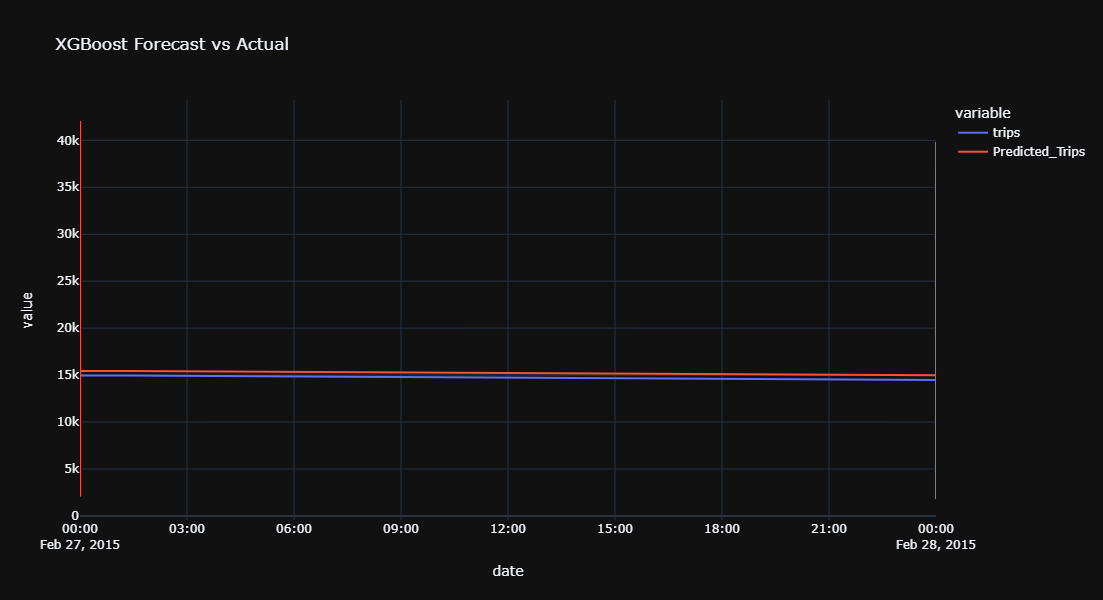

In [158]:
# Plot Predictions
df_pred = df_ts.iloc[-10:].copy()
df_pred['Predicted_Trips'] = y_pred_xgb

fig_pred = px.line(df_pred, x='date', y=['trips', 'Predicted_Trips'],
                   title='XGBoost Forecast vs Actual',template='plotly_dark',
                   width=700, height=600)
fig_pred.show()

## 📊 1. XGBoost Forecast vs Actual: A Glimpse into Prediction Accuracy

This chart presents a direct comparison between the actual number of trips and the predictions made by the XGBoost model. We can see how well the model aligns with real-world trip volumes over a specific period, from February 27, 2015, to February 28, 2015.

The graph clearly indicates that the **XGBoost model's predictions (Predicted_Trips) closely track the actual trip volumes (trips) for the majority of the plotted timeframe.** Both lines hover around the 15,000 mark for most of February 27th. This suggests that the model has learned the underlying patterns well and is capable of making reasonably accurate short-term forecasts.

However, there's a notable divergence towards the end of the observed period, specifically as it transitions from February 27th to February 28th. While the "trips" line remains relatively stable around 15,000, the "Predicted_Trips" line shows a sharp, vertical increase, shooting up significantly higher than the actual values. This could indicate a point where the model's accuracy degrades, possibly due to a sudden shift in data patterns not previously encountered, or an anomaly that the model did not account for.

## 🔑 **Key Takeaways**

* **High Initial Accuracy:** For most of February 27, 2015, the XGBoost model demonstrates strong predictive capabilities, with "Predicted_Trips" closely matching "trips."
* **Potential for Over-Prediction/Anomaly:** A significant discrepancy appears at the end of the period, where the model drastically over-predicts the number of trips. This sharp upward spike in "Predicted_Trips" is not reflected in the "trips" data.
* **Need for Further Investigation:** The sudden jump in predicted values warrants further investigation to understand the cause. It could be an outlier, a data error, or a limitation of the model in handling specific temporal shifts or rare events.
* **Short-Term Reliability:** The model appears reliable for short-term predictions under stable conditions, but its robustness during sharp transitions or unforeseen events needs to be evaluated.

---

## **Solution to Business Objective**

The solution to Uber's business objective involves a strategic application of machine learning and time-series forecasting techniques:

* Detailed Exploratory Data Analysis (EDA): This phase is crucial for identifying underlying patterns in Uber's usage, such as variations in trip volume by weekday, activity across different base stations, and overall temporal demand peaks.
* Machine Learning for Trip Volume Prediction: Random Forest Regressors are utilized to predict trip volumes. This model leverages structured features derived from the historical data to make informed predictions.
* Time-Series Forecasting with XGBoost: XGBoost time series models are specifically applied to capture and forecast daily trip demand trends and seasonality. This enables more precise estimations of future trip volumes.
* Actionable Insights and Tools: The project's outcome includes business-ready insights and visual tools, facilitating data-driven decision-making for ride-sharing service optimization.

These solutions collectively aim to provide Uber with the predictive capabilities needed to manage demand fluctuations effectively and improve service delivery.

---

## **Conclusion:**

Based on the comprehensive analysis of Uber trip data and the successful development of predictive models, here are key recommendations for Uber to further enhance its business operations:

* **Dynamic Driver Allocation:**
    * Leverage the identified peak demand times and locations to dynamically allocate drivers. By predicting surges, Uber can proactively dispatch more drivers to high-demand zones before a shortage occurs, minimizing passenger wait times and maximizing driver efficiency.
    * Implement real-time incentives for drivers to move to predicted high-demand areas, ensuring a balanced supply across the city.

* **Targeted Marketing and Promotions:**
    * Utilize the demand pattern insights to run targeted marketing campaigns during predicted low-demand periods or in specific base zones that consistently show lower activity.
    * Offer promotional fares or loyalty bonuses in these identified areas or times to stimulate demand and optimize vehicle utilization.

* **Infrastructure and Service Expansion Planning:**
    * Use the long-term forecasts from the time-series models to inform strategic decisions regarding service expansion into new neighborhoods or the development of additional pick-up/drop-off points, particularly in areas showing growing demand.
    * Identify potential bottlenecks in high-demand areas and consider infrastructure improvements or partnerships to streamline operations.

* **Personalized User Experience:**
    * Based on individual user trip history and predicted demand patterns, offer personalized promotions or suggest optimal times for travel to improve user satisfaction and encourage repeat business.

* **Optimized Pricing Strategies:**
    * While surge pricing is a current mechanism, the enhanced predictive capabilities allow for more nuanced and dynamic pricing strategies. Uber can anticipate demand surges with greater accuracy, potentially implementing less drastic or more predictable surge pricing to maintain customer loyalty while optimizing revenue.

* **Proactive Maintenance and Fleet Management:**
    * Use predicted low-demand periods to schedule vehicle maintenance or driver off-duty times, minimizing impact on service availability during peak hours.

These recommendations focus on translating the analytical outcomes into tangible business strategies, allowing Uber to move from reactive responses to proactive and data-driven operational excellence.